<a href="https://colab.research.google.com/github/ayushNautiyal35/ML_basic_to_advanced/blob/main/California_housing_price2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Importing libraries



In [30]:
import pandas as pd
import urllib.request

We make the function to import our dataset

In [31]:
def load_housing_data():
  url="https://raw.githubusercontent.com/ayushNautiyal35/ML_basic_to_advanced/main/California_housing_prices/dataset/housing.csv"

  return pd.read_csv(url)


In [32]:
housing=load_housing_data()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


info() method is useful to get a quick description of the data, in particular the total number of rows,eachattribute type, and the number of non null

In [33]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In the given dataset all the values are numerical except ocean_proximity so we are going to count how many districts belong to each category by using value counts method

In [34]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

describe method show the summary of each numerical attribute

In [35]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


the std value show the standard deviation which measures how dispersed the values are. The 25%,50% and 75% rows show the corresponding percentile,it indicates the value below which a given percentage of observations in a group of observations fall.
Ex- 25% of the districts  have a housing_median_age lower than 18,while 50% are lower than 29 and 75% are lower than 37.
These are often called 25th percentile(first quartile), median,75th percentile(third quartile).

Another way to take feel is from histogram

In [36]:
import matplotlib.pyplot as plt


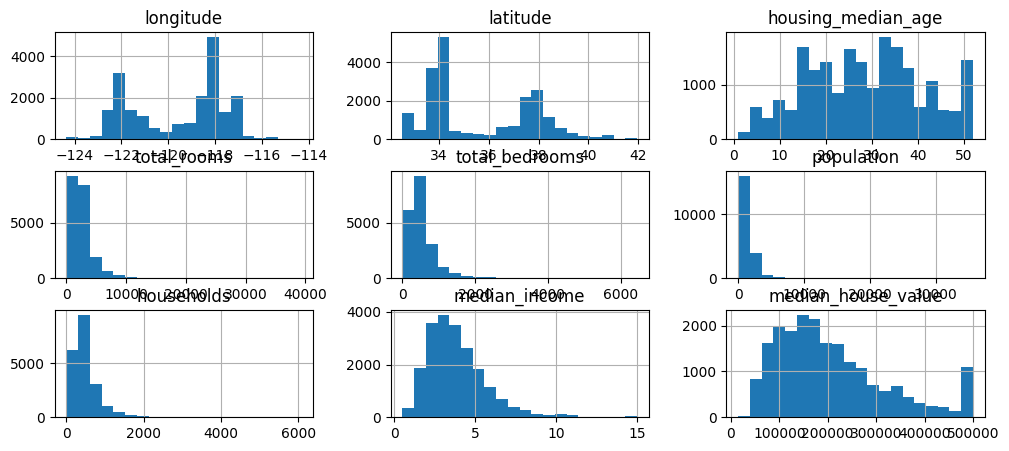

In [37]:
housing.hist(bins=20,figsize=(12,5))
plt.show()

**2. Test Data**

to create a test data set fro the data.

Snooping bias- When you estimate the generalization error using the test set, your estimate will be too optimistic and you will launch a system that will not perform as expected.   

Method 1: to pick the random values let us suppose 20% of the sample data.

In [38]:
import numpy as np

NumPy is a Python library used for working with arrays.

It also has functions for working in domain of linear algebra, fourier transform, and matrices.

NumPy was created in 2005 by Travis Oliphant. It is an open source project and you can use it freely.

NumPy stands for Numerical Python.

In [39]:
def shuffle_and_split_data(data,test_ratio):
  shuffled_indices=np.random.permutation(len(data))
  size=int(len(data)*test_ratio)
  test_indices=shuffled_indices[:size]
  train_indices=shuffled_indices[size:]
  return data.iloc[train_indices],data.iloc[test_indices]

1. we take the random value fron the dataset.permutation(x) actually returns a new variable and the original data is not changed. Where as numpy. random. shuffle(x) has changed original data and does not return a new variable.

2.we are defining 20% size.

3. we are taking the elements upto the size in shuffled indices array.

4.same as above but we are taking from size here.

5. The iloc function in Python returns a view of the selected rows and columns from a Pandas DataFrame. This view can be used to access, modify, or delete the selected data. The returned view is a Pandas DataFrame or Series, depending on the number of rows or columns selected.

In [40]:
train_set,test_set=shuffle_and_split_data(housing,0.2)
len(test_set)

4128

In [41]:
len(train_set)

16512

In [42]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12773,-121.43,38.62,36.0,1765.0,438.0,1008.0,382.0,2.0639,73000.0,INLAND
17276,-119.69,34.41,44.0,1208.0,357.0,603.0,297.0,2.6103,500000.0,<1H OCEAN
11952,-117.44,33.93,33.0,1371.0,236.0,715.0,227.0,4.3750,129900.0,INLAND
18442,-121.82,37.25,24.0,3344.0,531.0,1768.0,541.0,5.8305,245600.0,<1H OCEAN
7692,-118.11,33.95,34.0,1723.0,279.0,617.0,252.0,6.7501,400000.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20564,-121.71,38.72,32.0,710.0,155.0,550.0,154.0,2.8882,151400.0,INLAND
15744,-122.43,37.78,52.0,1952.0,628.0,1284.0,576.0,2.1050,316700.0,NEAR BAY
16006,-122.46,37.74,51.0,1905.0,291.0,707.0,284.0,6.2561,431000.0,NEAR BAY
5554,-118.40,33.96,44.0,1138.0,228.0,497.0,228.0,4.1852,303300.0,<1H OCEAN


When we are running it again it produce different set by ths your ML algorithms are going to learn everything.

Method 2: To have stable train/test split even after updating dataset a common solution is to use each instance identifier to decide whether or not it should go in test we can use hase.

In [43]:
from zlib import crc32

With the help of zlib.crc32() method, we can compute the checksum for crc32 (Cyclic Redundancy Check) to a particular data. It will give 32-bit integer value as a result by using zlib.crc32() method.
The checksum is a kind of error Detection method in Computer Networks. This method used by the higher layer protocols and makes use of Checksum Generator on the Sender side and Checksum Checker on the Receiver side

In [44]:
def is_id_in_test_set(identifier,test_ratio):
  return crc32(np.int64(identifier))<test_ratio * 2**32

np. int64 is an 8-bytes-wide signed integer.
For numeric data types, double-asterisk (**) is defined as an Exponentiation(power).
2 to the Power of 32 is equal to 4294967296.
4294967296*0.2= 858993459.2.

In [45]:
def split_data_with_id_hash(data,test_ratio,id_column):
  ids=data[id_column]
  in_test_set=ids.apply(lambda id_:is_id_in_test_set(id_,test_ratio))
  return data.loc[~in_test_set],data.loc[in_test_set]

Pandas.apply allow the users to pass a function and apply it on every single value of the Pandas series. It comes as a huge improvement for the pandas library as this function helps to segregate data according to the conditions required due to which it is efficiently used in data science and machine learning.
Python Lambda Functions are anonymous function means that the function is without a name. As we already know that the def keyword is used to define a normal function in Python. Similarly, the lambda keyword is used to define an anonymous function in Python.


Unfortunately the housing dataset doesn't have an identifier column.The simplest solution is to use the row index as id:

In [46]:
housing_with_id=housing.reset_index()
train_set,test_set=split_data_with_id_hash(housing_with_id,0.2,"index")

In [47]:
len(test_set)

4128

In [48]:
len(train_set)

16512

In [49]:
test_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20615,20615,-121.54,39.08,23.0,1076.0,216.0,724.0,197.0,2.3598,57500.0,INLAND
20617,20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND
20622,20622,-121.44,39.00,20.0,755.0,147.0,457.0,157.0,2.4167,67000.0,INLAND
20626,20626,-121.43,39.18,36.0,1124.0,184.0,504.0,171.0,2.1667,93800.0,INLAND


But if we are going to use row index as id then we ensure that no row gets delted it is difficult so we choose most satble features which is not going to change in this case longitude and latitude

In [50]:
housing_with_id['id']=housing['longitude']*1000+housing['latitude']
train_set,test_set=split_data_with_id_hash(housing_with_id,0.2,"id")

In [51]:
housing_with_id['id'].head()

0   -122192.12
1   -122182.14
2   -122202.15
3   -122212.15
4   -122212.15
Name: id, dtype: float64

Method 3:Scikit-Learn provides a few function to split data.One of the simplest wap is train_test_split it is like like shuffle and split data we discussed above which randomly divides.

In [52]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

random_state parameter allows you to set random generator seed.
The seed() method is used to initialize the random number generator.

The random number generator needs a number to start with (a seed value), to be able to generate a random number.

In [53]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


Method 4: So far we have discussed the random sampling method and this is generally fine if your dataset is large enough but if it is not you run the risk of introducing a significant sampling bias.
Ex: A company decides to call 1000 persons to ask some questions so they will not call any 1000 persons in phonebook they try to ensure that they are representative of whole population like in us 51.1% are female and 48.9% malesso they will call 511 females and 489 males.

This is called stratified sampling: the data is divided into homogenous groups called strata and the right number of instances are selected from strata to guaranteee that test data is representation of whole data.

In [54]:
housing['income_cat']=pd.cut(housing['median_income'],bins=[0,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])

Representation as bar graph

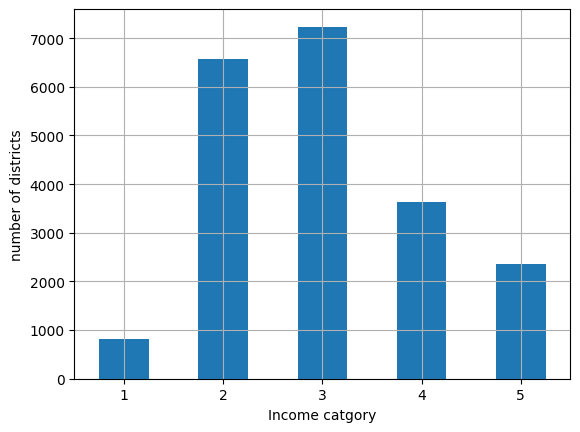

In [58]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("Income catgory")
plt.ylabel('number of districts')
plt.show()

Split using strat

In [60]:
strat_train_set,strat_test_set=train_test_split(housing,test_size=0.2,stratify=housing['income_cat'],random_state=42)

In [61]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN,2
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN,2
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN,4
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN,4


Now no need of income_cat so we can delete it

In [63]:
for set_ in (strat_train_set,strat_test_set):
  set_.drop("income_cat",axis=1,inplace=True)

In [64]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN
